## Analisis de datos de Abastecimiento de combustible  de camiones autonomos

**Objetivo:**

Analizar la data de abastecimiento de combustible para determinar si el cambio de horario del personal que atiende el abastecimiento ha logrado mejoras a partir del mes de mayo del 2024 en los siguientes aspectos:

1. La cantidad horas en que le equipo tiene la demoras "sin combustible" ha disminuido?

2. El tiempo promedio x abastecimiento de combustible ha disminuido?

3. La cantidad de abastecimientos > a 25 minutos ha disminuido?

4. Existe aún una diferencia entre guardias relacionada a la cantidad en horas de la demora "sin combustible'?


In [1]:
# Importar librerias necesarias
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Extracción de la Data    


In [2]:
# Leer el archivo excel que contiene los datos a analizar y mostrar los primeros 5 registros
grifo = pd.read_excel('demoras_combustible.xlsx')   # Leer el archivo de excel
grifo.head()   # Mostrar los primeros 5 registros

,machine,DESCRIPTION,Name_Delayclass,Descrip_delayclass,Category_delay,Start_time,Finish_time,total_time
0,HT007,NaN,Combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 10:52:37,2024-07-02 11:13:46,21.0
1,HT015,A scheduled assignment arrival delay.,Combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 10:26:30,2024-07-02 10:48:24,22.0
2,HT001,NaN,Combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:59:14,2024-07-02 10:19:22,20.0
3,HT014,A scheduled assignment arrival delay.,Combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:36:47,2024-07-02 09:59:08,23.0
4,HT029,A scheduled assignment arrival delay.,Combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:08:45,2024-07-02 09:32:18,24.0


## Preparación de la Data para el analisis

In [4]:
# Mostrar los valores unicos de la columna Name_Delayclass
grifo["Name_Delayclass"].unique()  

array(['Abastecimiento_combustible', 'Sin_combustible',
       'Sin bahía de combustible'], dtype=object)

In [3]:
# Reemplazar los valores de la columna Name_Delayclass
replacements = {'Combustible ': 'Abastecimiento_combustible', 'Sin Combustible': 'Sin_combustible', 'Sin  combustible': 'Sin_combustible', }

# replace values using the .map() method
grifo['Name_Delayclass'] = grifo['Name_Delayclass'].map(replacements).fillna(grifo['Name_Delayclass'])
grifo["Name_Delayclass"].unique()

array(['Abastecimiento_combustible', 'Sin_combustible',
       'Sin bahía de combustible'], dtype=object)

In [5]:
# Insertar una nueva columna con el tiempo total en minutos
grifo['total_time_hour'] = grifo['total_time'] / 60
grifo.head(-10)

,machine,DESCRIPTION,Name_Delayclass,Descrip_delayclass,Category_delay,Start_time,Finish_time,total_time,total_time_hour
0,HT007,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 10:52:37,2024-07-02 11:13:46,21.0,0.350000
1,HT015,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 10:26:30,2024-07-02 10:48:24,22.0,0.366667
2,HT001,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:59:14,2024-07-02 10:19:22,20.0,0.333333
3,HT014,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:36:47,2024-07-02 09:59:08,23.0,0.383333
4,HT029,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-07-02 09:08:45,2024-07-02 09:32:18,24.0,0.400000
...,...,...,...,...,...,...,...,...,...
25876,HT008,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2021-04-27 17:58:02,2021-04-27 18:15:02,17.0,0.283333
25877,HT007,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2021-04-26 09:37:21,2021-04-26 09:57:53,20.0,0.333333
25878,HT008,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2021-04-25 17:52:29,2021-04-25 18:26:09,34.0,0.566667
25879,HT010,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2021-04-25 17:32:53,2021-04-25 17:58:21,26.0,0.433333


In [6]:
# Crear un nuevo dataframe con los datos del año 2024
grifo_2024 = grifo[(grifo['Start_time'] >= '2023-12-31 06:30:00') & (grifo['Start_time'] <= '2024-06-30 06:30:00')]
grifo_2024.head(-10)

,machine,DESCRIPTION,Name_Delayclass,Descrip_delayclass,Category_delay,Start_time,Finish_time,total_time,total_time_hour
99,HT008,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 04:35:56,2024-06-30 05:07:22,32.0,0.533333
100,HT019,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 03:37:04,2024-06-30 04:04:07,27.0,0.450000
101,HT004,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:49:59,2024-06-30 03:26:54,37.0,0.616667
102,HT009,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:29:29,2024-06-30 03:06:25,37.0,0.616667
103,HT002,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:16:52,2024-06-30 02:43:59,27.0,0.450000
...,...,...,...,...,...,...,...,...,...
7588,HT008,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 21:08:45,2023-12-31 21:26:23,18.0,0.300000
7589,HT003,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 20:47:22,2023-12-31 21:01:20,14.0,0.233333
7590,HT009,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 16:44:07,2023-12-31 17:09:17,25.0,0.416667
7591,HT012,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 16:57:00,2023-12-31 17:09:04,12.0,0.200000


In [7]:
# Mostrar los tipos de datos que se tienen en el dataframe
grifo_2024.dtypes

machine                       object
DESCRIPTION                   object
Name_Delayclass               object
Descrip_delayclass            object
Category_delay                object
Start_time            datetime64[ns]
Finish_time           datetime64[ns]
total_time                   float64
total_time_hour              float64
dtype: object

In [8]:

# Función para calcular la guardia correspondiente a una fecha y hora dada
def fun_guardia(fecha_hora):
  """
  Calcula la guardia correspondiente a una fecha y hora dada.

  Parámetros:
  - fecha_hora: Un objeto datetime que representa la fecha y hora para la cual se desea calcular la guardia.

  Retorna:
  - Una cadena de texto que indica la guardia correspondiente a la fecha y hora dada.

  Ejemplo:
  >>> fecha_hora = datetime.strptime('2023-12-31 06:30:00', '%Y-%m-%d %H:%M:%S')
  >>> fun_guardia(fecha_hora)
  'Guardia 1'
  """
  date_base = datetime.strptime('2023-12-31 06:30:00', '%Y-%m-%d %H:%M:%S')
  date_rest = fecha_hora - date_base
  days_rest = date_rest.days
  seconds_rest = date_rest.seconds
  residuo = days_rest % 16

  if residuo >= 0 and residuo <= 3:
    if seconds_rest < 43200:
      guardia = 'Guardia 1'
    else:
      guardia = 'Guardia 3'
  elif residuo >= 4 and residuo <= 7:
    if seconds_rest < 43200:
      guardia = 'Guardia 2'
    else:
      guardia = 'Guardia 1'
  elif residuo >= 8 and residuo <= 11:
    if seconds_rest < 43200:
      guardia = 'Guardia 4'
    else:
      guardia = 'Guardia 2'
  else:
    if seconds_rest < 43200:
      guardia = 'Guardia 3'
    else:
      guardia = 'Guardia 4'

  return guardia

In [9]:

# Función para calcular el turno de guardia según la fecha y hora especificadas
def fun_guardia_turno(fecha_hora):
  """
  Calcula el turno de guardia según la fecha y hora especificadas.

  Parámetros:
  - fecha_hora: Objeto datetime que representa la fecha y hora para calcular el turno de guardia.

  Retorna:
  - guardia_turno: Cadena de texto que indica el turno de guardia correspondiente a la fecha y hora especificadas.

  Descripción:
  Esta función calcula el turno de guardia basado en la fecha y hora proporcionadas. El cálculo se realiza en base a una fecha base predefinida y se determina el residuo de días transcurridos desde esa fecha. Luego, se verifica el residuo para asignar el turno de guardia correspondiente.

  Los turnos de guardia se dividen en cuatro grupos de cuatro turnos cada uno. Cada grupo tiene dos turnos de día y dos turnos de noche. Los turnos de día se consideran desde las 06:30:00 hasta las 18:30:00, y los turnos de noche se consideran desde las 18:30:00 hasta las 06:30:00 del día siguiente.

  El turno de guardia se asigna de la siguiente manera:
  - Residuo 0-3: Guardia 1 día si la hora es menor a las 18:30:00, o Guardia 3 noche si la hora es mayor o igual a las 18:30:00.
  - Residuo 4-7: Guardia 2 día si la hora es menor a las 18:30:00, o Guardia 1 noche si la hora es mayor o igual a las 18:30:00.
  - Residuo 8-11: Guardia 4 día si la hora es menor a las 18:30:00, o Guardia 2 noche si la hora es mayor o igual a las 18:30:00.
  - Residuo 12-15: Guardia 3 día si la hora es menor a las 18:30:00, o Guardia 4 noche si la hora es mayor o igual a las 18:30:00.
  """
  # Código de la función
  pass
  date_base = datetime.strptime('2023-12-31 06:30:00', '%Y-%m-%d %H:%M:%S')
  date_rest = fecha_hora - date_base
  days_rest = date_rest.days
  seconds_rest = date_rest.seconds
  residuo = days_rest % 16

  if residuo >= 0 and residuo <= 3:
    if seconds_rest < 43200:
      guardia_turno = 'Guardia 1 día'
    else:
      guardia_turno = 'Guardia 3 noche'
  elif residuo >= 4 and residuo <= 7:
    if seconds_rest < 43200:
      guardia_turno = 'Guardia 2 día'
    else:
      guardia_turno = 'Guardia 1 noche'
  elif residuo >= 8 and residuo <= 11:
    if seconds_rest < 43200:
      guardia_turno = 'Guardia 4 día'
    else:
      guardia_turno = 'Guardia 2 noche'
  else:
    if seconds_rest < 43200:
      guardia_turno = 'Guardia 3 día'
    else:
      guardia_turno = 'Guardia 4 noche'

  return guardia_turno

In [10]:
# Asignar el mes de inicio en base a la fecha y hora de inicio
ene_ini = datetime.strptime('2023-12-31 06:30:00', '%Y-%m-%d %H:%M:%S')
feb_ini = datetime.strptime('2024-01-31 06:30:00', '%Y-%m-%d %H:%M:%S')
mar_ini = datetime.strptime('2024-02-29 06:30:00', '%Y-%m-%d %H:%M:%S')
abr_ini = datetime.strptime('2024-03-31 06:30:00', '%Y-%m-%d %H:%M:%S')
may_ini = datetime.strptime('2024-04-30 06:30:00', '%Y-%m-%d %H:%M:%S')
jun_ini = datetime.strptime('2024-05-31 06:30:00', '%Y-%m-%d %H:%M:%S')
jul_ini = datetime.strptime('2024-06-30 06:30:00', '%Y-%m-%d %H:%M:%S')
ago_ini = datetime.strptime('2024-07-31 06:30:00', '%Y-%m-%d %H:%M:%S')
set_ini = datetime.strptime('2024-08-31 06:30:00', '%Y-%m-%d %H:%M:%S')
oct_ini = datetime.strptime('2024-09-30 06:30:00', '%Y-%m-%d %H:%M:%S')
nov_ini = datetime.strptime('2024-10-31 06:30:00', '%Y-%m-%d %H:%M:%S')
dic_ini = datetime.strptime('2024-11-30 06:30:00', '%Y-%m-%d %H:%M:%S')
dic_fin = datetime.strptime('2024-12-31 06:30:00', '%Y-%m-%d %H:%M:%S')

In [11]:
# Función para obtener el mes correspondiente a una fecha y hora
def fun_mes(fecha_hora):
    """
    Calcula el mes correspondiente a una fecha y hora dadas.

    Parámetros:
    - fecha_hora: Un objeto datetime que representa la fecha y hora para la cual se desea calcular el mes.

    Retorna:
    - Una cadena de texto que indica el mes correspondiente a la fecha y hora dadas.

    Descripción:
    Esta función calcula el mes basado en la fecha y hora proporcionadas. Se compara la fecha y hora con intervalos predefinidos para determinar el mes correspondiente.

    Los intervalos se definen de acuerdo a los límites de los meses del año. Si la fecha y hora se encuentra dentro de un intervalo, se asigna el mes correspondiente.

    Ejemplo:
    >>> fecha_hora = datetime.strptime('2024-03-31 06:30:00', '%Y-%m-%d %H:%M:%S')
    >>> fun_mes(fecha_hora)
    '03_Marzo'
    """
    if fecha_hora >= ene_ini and fecha_hora <= feb_ini:
        mes = '01_Enero'
    elif fecha_hora >= feb_ini and fecha_hora <= mar_ini:
        mes = '02_Febrero'
    elif fecha_hora >= mar_ini and fecha_hora <= abr_ini:
        mes = '03_Marzo'
    elif fecha_hora >= abr_ini and fecha_hora <= may_ini:
        mes = '04_Abril'
    elif fecha_hora >= may_ini and fecha_hora <= jun_ini:
        mes = '05_Mayo'
    elif fecha_hora >= jun_ini and fecha_hora <= jul_ini:
        mes = '06_Junio'
    elif fecha_hora >= jul_ini and fecha_hora <= ago_ini:
        mes = '07_Julio'
    elif fecha_hora >= ago_ini and fecha_hora <= set_ini:
        mes = '08_Agosto'
    elif fecha_hora >= set_ini and fecha_hora <= oct_ini:
        mes = '09_Setiembre'
    elif fecha_hora >= oct_ini and fecha_hora <= nov_ini:
        mes = '10_Octubre'
    elif fecha_hora >= nov_ini and fecha_hora <= dic_ini:
        mes = '11_Noviembre'
    elif fecha_hora >= dic_ini and fecha_hora <= dic_fin:
        mes = '12_Diciembre'
    else:
        mes = 'Mes Desconocido'

    return mes

In [12]:
# Crear nuevas columnas en el dataframe grifo_2024 con la información de guardia, turno de guardia y mes
grifo_2024['guardia'] = grifo_2024['Start_time'].apply(fun_guardia)
grifo_2024['guardia_turno'] = grifo_2024['Start_time'].apply(fun_guardia_turno)
grifo_2024['mes'] = grifo_2024['Start_time'].apply(fun_mes)

/tmp/ipykernel_42503/2801703611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grifo_2024['guardia'] = grifo_2024['Start_time'].apply(fun_guardia)
/tmp/ipykernel_42503/2801703611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grifo_2024['guardia_turno'] = grifo_2024['Start_time'].apply(fun_guardia_turno)
/tmp/ipykernel_42503/2801703611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [13]:
# Mostrar los ultimos 5 registros del dataframe grifo_2024
grifo_2024.head(-5)


,machine,DESCRIPTION,Name_Delayclass,Descrip_delayclass,Category_delay,Start_time,Finish_time,total_time,total_time_hour,guardia,guardia_turno,mes
99,HT008,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 04:35:56,2024-06-30 05:07:22,32.0,0.533333,Guardia 1,Guardia 1 noche,06_Junio
100,HT019,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 03:37:04,2024-06-30 04:04:07,27.0,0.450000,Guardia 1,Guardia 1 noche,06_Junio
101,HT004,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:49:59,2024-06-30 03:26:54,37.0,0.616667,Guardia 1,Guardia 1 noche,06_Junio
102,HT009,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:29:29,2024-06-30 03:06:25,37.0,0.616667,Guardia 1,Guardia 1 noche,06_Junio
103,HT002,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2024-06-30 02:16:52,2024-06-30 02:43:59,27.0,0.450000,Guardia 1,Guardia 1 noche,06_Junio
...,...,...,...,...,...,...,...,...,...,...,...,...
7593,HT004,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 15:34:06,2023-12-31 15:59:26,25.0,0.416667,Guardia 1,Guardia 1 día,01_Enero
7594,HT023,NaN,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 15:08:46,2023-12-31 15:34:27,26.0,0.433333,Guardia 1,Guardia 1 día,01_Enero
7595,HT024,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 14:18:29,2023-12-31 14:43:47,25.0,0.416667,Guardia 1,Guardia 1 día,01_Enero
7596,HT019,A scheduled assignment arrival delay.,Abastecimiento_combustible,Usado cuando un equipo ha parado to refuel. Th...,Perdida Interna,2023-12-31 11:54:23,2023-12-31 12:19:53,25.0,0.416667,Guardia 1,Guardia 1 día,01_Enero


## Analizar la Data ordenada para responder a las preguntas

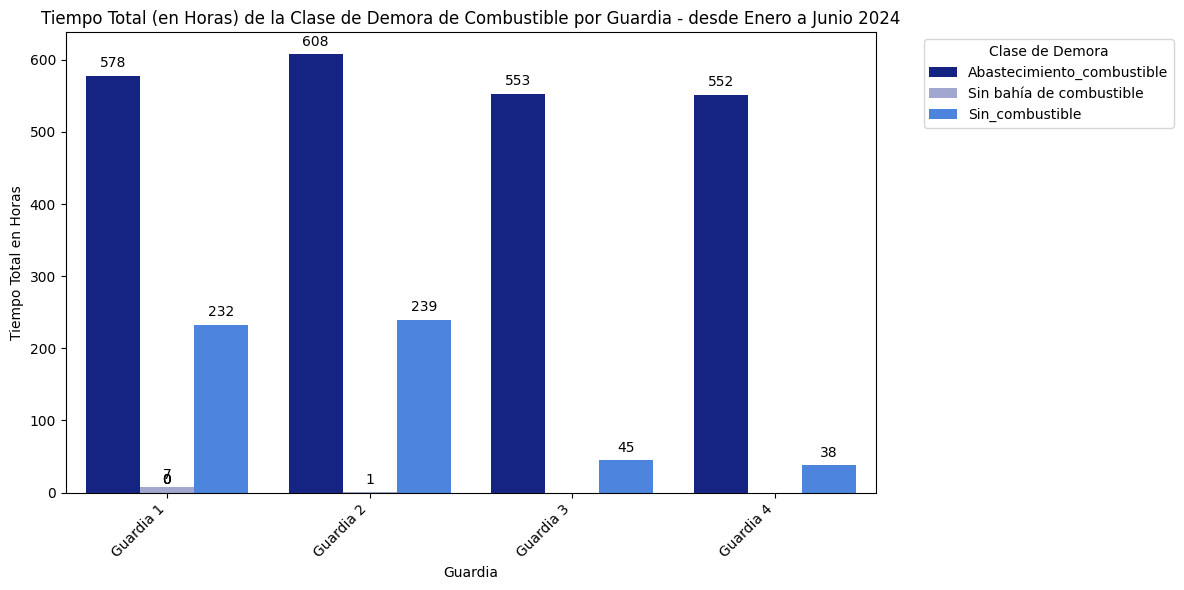

In [ ]:
# Group the data and sum 'total_time'
grouped_data = grifo_2024.groupby(['guardia', 'Name_Delayclass'])['total_time_hour'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_data, x='guardia', y='total_time_hour', hue='Name_Delayclass', palette={'Abastecimiento_combustible': '#031795', 'Sin_combustible': '#347ff6', 'Sin bahía de combustible':'#9aa2d5'})

# Muestra los valores encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xlabel('Guardia')
plt.ylabel('Tiempo Total en Horas')
plt.title('Tiempo Total (en Horas) de la Clase de Demora de Combustible por Guardia - desde Enero a Junio 2024')
plt.xticks(rotation=45, ha='right')
# Place legend outside the plot
plt.legend(title='Clase de Demora', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(title='Tipo de Demora')
plt.tight_layout()
plt.show()

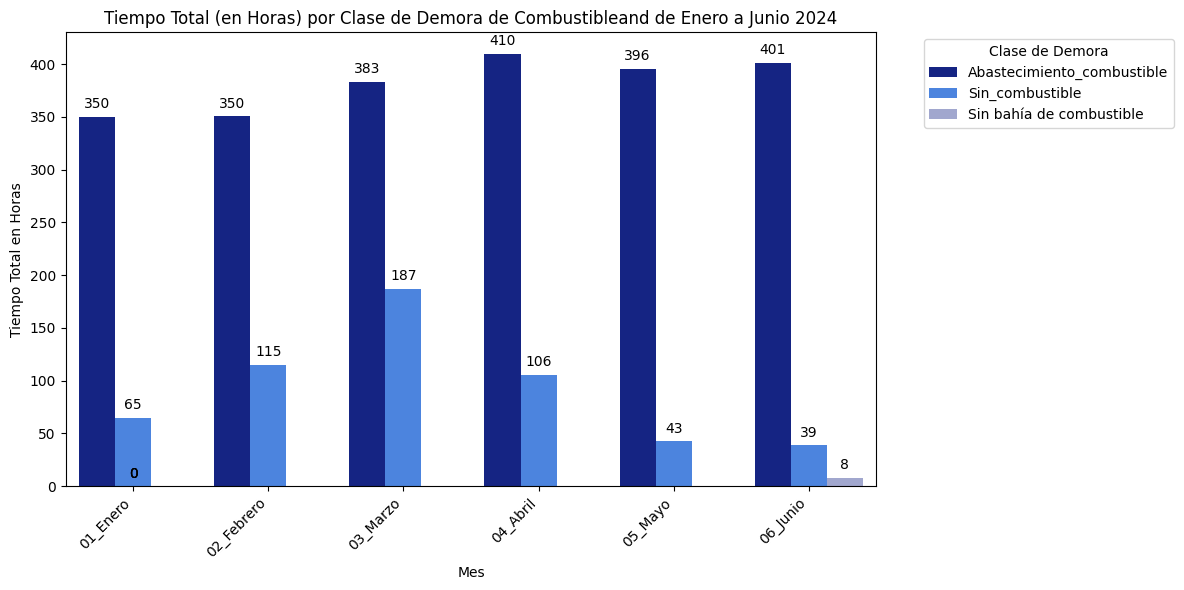

In [23]:
# Group the data and sum 'total_time'
grouped_data = grifo_2024.groupby(['mes', 'Name_Delayclass'])['total_time_hour'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_data, x='mes', y='total_time_hour', hue='Name_Delayclass', palette={'Abastecimiento_combustible': '#031795', 'Sin_combustible': '#347ff6', 'Sin bahía de combustible':'#9aa2d5'})

# Muestra los valores encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xlabel('Mes')
plt.ylabel('Tiempo Total en Horas')
plt.title('Tiempo Total (en Horas) por Clase de Demora de Combustibleand de Enero a Junio 2024')
plt.xticks(rotation=45, ha='right')
# Place legend outside the plot
plt.legend(title='Clase de Demora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

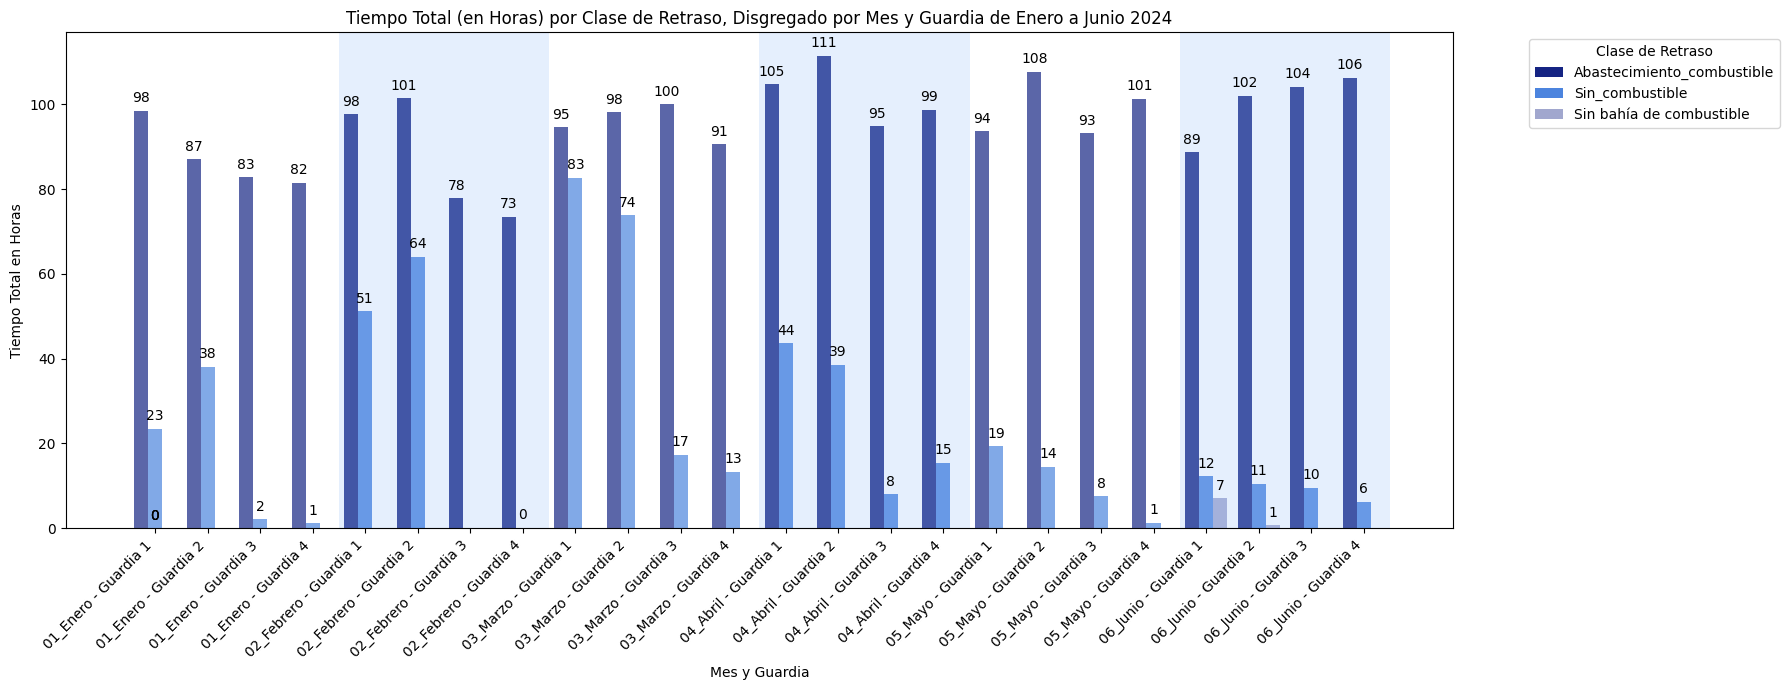

In [24]:
# Agrupa los datos y suma 'total_time'
meses_data = grifo_2024.groupby(['mes', 'guardia', 'Name_Delayclass'])['total_time_hour'].sum().reset_index()

# Combina 'mes' y 'guardia' en una sola columna
meses_data['mes_guardia'] = meses_data['mes'] + ' - ' + meses_data['guardia']

# Crea una figura y un eje
plt.figure(figsize=(18, 7))  # Ajusta el tamaño de la figura según sea necesario

# Crea el gráfico de barras
ax = sns.barplot(data=meses_data, x='mes_guardia', y='total_time_hour', hue='Name_Delayclass', palette={'Abastecimiento_combustible': '#031795', 'Sin_combustible': '#347ff6', 'Sin bahía de combustible':'#9aa2d5'})

# Muestra los valores encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Colores de fondo para cada mes (ajusta estos colores según tus necesidades)
colores_fondo = {'01_Enero': '#FFFF', '02_Febrero': '#ABCBFA', '03_Marzo': '#FFFFFF', '04_Abril': '#ABCBFA', '05_Mayo': '#FFFFFF', '06_Junio': '#ABCBFA', '07_Julio': '#FFFFFF'}

# Intenta añadir los colores de fondo
# (Esto podría requerir ajustes manuales dependiendo de la distribución de las barras)

x_ticks = ax.get_xticks()
for i, mes in enumerate(meses_data['mes'].unique()):
    inicio = i * len(meses_data['guardia'].unique())
    fin = (i + 1) * len(meses_data['guardia'].unique())
    if i < 5:
      ax.axvspan(x_ticks[inicio] - 0.5, x_ticks[fin - 1] + 0.5, facecolor=colores_fondo.get(mes, 'white'), alpha=0.3)
    elif i == 5:
      ax.axvspan(x_ticks[inicio] - 0.5, x_ticks[24 - 1] + 0.5, facecolor=colores_fondo.get(mes, 'white'), alpha=0.3)


# Configura las etiquetas de los ejes y el título
plt.xlabel('Mes y Guardia')
plt.ylabel('Tiempo Total en Horas')
plt.title('Tiempo Total (en Horas) por Clase de Retraso, Disgregado por Mes y Guardia de Enero a Junio 2024')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x si es necesario
# Place legend outside the plot
plt.legend(title='Clase de Retraso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

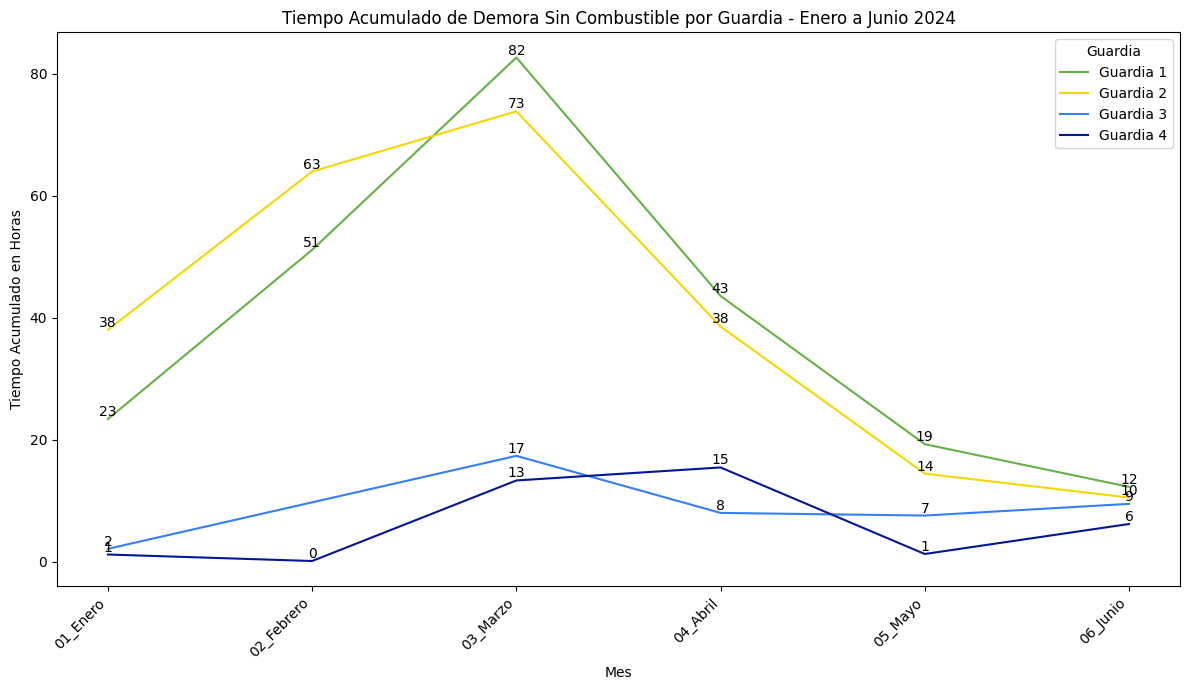

In [25]:
# Filtrar los datos para la demora "Sin_combustible"
sin_combustible_data = grifo_2024[grifo_2024['Name_Delayclass'] == 'Sin_combustible']

# Calcular el tiempo acumulado por mes y guardia
cumulative_data = sin_combustible_data.groupby(['mes', 'guardia'])['total_time_hour'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=cumulative_data, x='mes', y='total_time_hour', hue='guardia', palette={'Guardia 1': '#64B246', 'Guardia 2': '#F5D700', 'Guardia 3':'#347ff6', 'Guardia 4': '#031795'})
# Colocar valores en cada punto sin decimales
for i, row in cumulative_data.iterrows():
    plt.text(row['mes'], row['total_time_hour'], int(row['total_time_hour']), ha='center', va='bottom')


# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Tiempo Acumulado en Horas')
plt.title('Tiempo Acumulado de Demora Sin Combustible por Guardia - Enero a Junio 2024')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Guardia')
plt.tight_layout()
plt.show()

In [28]:
abastecimiento_data = grifo_2024[grifo_2024['Name_Delayclass'] == 'Abastecimiento_combustible']

# Calcular el tiempo promedio de abastecimiento por mes
abastecimiento_data_prom = abastecimiento_data.groupby(['mes'])['total_time'].mean().reset_index(name='tiempo_promedio_abastecimiento')

abastecimiento_data_prom.head(7)

,mes,tiempo_promedio_abastecimiento
0,01_Enero,24.723204
1,02_Febrero,25.111111
2,03_Marzo,24.831533
3,04_Abril,24.378968
4,05_Mayo,22.572243
5,06_Junio,22.892483


In [29]:
abastecimiento_data = abastecimiento_data[abastecimiento_data['total_time'] >= 1]

abastecimiento_data_prom = abastecimiento_data.groupby(['mes'])['total_time'].mean().reset_index(name='tiempo_promedio_abastecimiento')

abastecimiento_data_prom.head(7)

,mes,tiempo_promedio_abastecimiento
0,01_Enero,24.840237
1,02_Febrero,25.231693
2,03_Marzo,24.858378
3,04_Abril,24.427435
4,05_Mayo,22.593720
5,06_Junio,22.936130


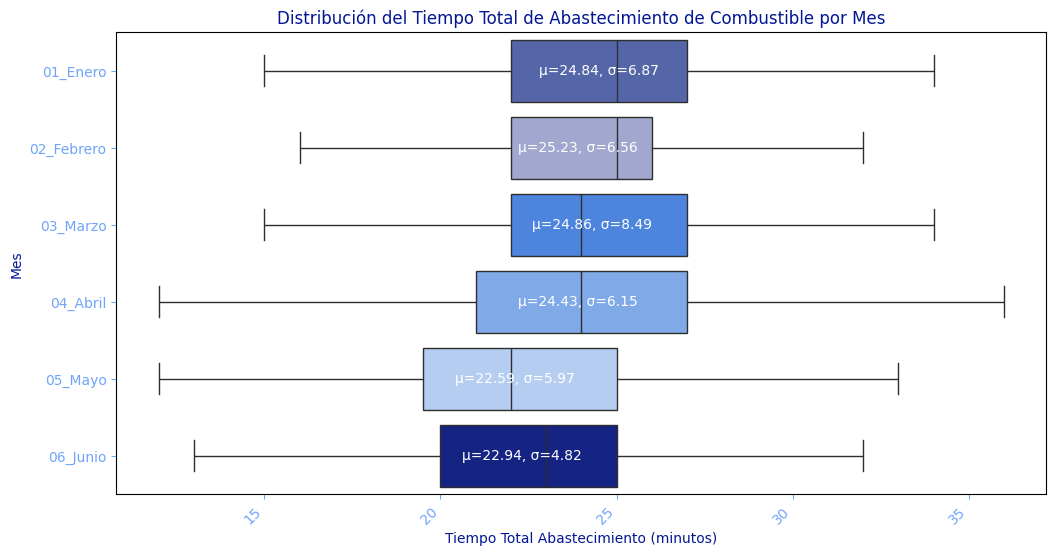

In [30]:
abastecimiento_data_ordenado = abastecimiento_data.sort_values(by=['mes'])
abastecimiento_data_ordenado.head(7)

# Calcula la media y la desviación estándar por mes
media_desviacion = abastecimiento_data_ordenado.groupby('mes')['total_time'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=abastecimiento_data_ordenado, y='mes', x='total_time', hue='mes', palette={'01_Enero': '#465eb6', '02_Febrero': '#9aa2d5', '03_Marzo':'#347ff6', '04_Abril': '#6fa5f9', '05_Mayo': '#abcbfa', '06_Junio': '#031795'}, showfliers=False)
plt.ylabel('Mes', color='#031795')
plt.xlabel('Tiempo Total Abastecimiento (minutos)', color='#031795')
plt.title('Distribución del Tiempo Total de Abastecimiento de Combustible por Mes', color='#031795')
plt.xticks(rotation=45, ha='right')

# Añade los valores de la media y la desviación estándar
pos = [22.8, 22.2, 22.6, 22.2, 20.4, 20.6]
for i, mes in enumerate(media_desviacion['mes']):
    media = media_desviacion['mean'][i]
    desviacion = media_desviacion['std'][i]
    ax.text(pos[i], i, f"μ={media:.2f}, σ={desviacion:.2f}", va='center', fontsize=10, color='white')

# Cambia el color de las líneas y los ejes
plt.setp(ax.artists, edgecolor='#031795')  # Cambia el color de las líneas de las cajas
#plt.setp(ax.lines, color='#031795')  # Cambia el color de los bigotes y la mediana
#ax.spines['bottom'].set_color('#031795')  # Cambia el color del eje x
#ax.spines['left'].set_color('#031795')  # Cambia el color del eje y
ax.tick_params(axis='x', colors='#6fa5f9')  # Cambia el color de las etiquetas del eje x
ax.tick_params(axis='y', colors='#6fa5f9')  # Cambia el color de las etiquetas del eje y
# Añade los valores de la media y la desviación estándar
#plt.grid(True, )
plt.show()

In [31]:
# Calcular el tiempo promedio de abastecimiento por mes
media_desviacion.head(7)

,mes,mean,std
0,01_Enero,24.840237,6.865967
1,02_Febrero,25.231693,6.560213
2,03_Marzo,24.858378,8.485055
3,04_Abril,24.427435,6.151665
4,05_Mayo,22.593720,5.965098
5,06_Junio,22.936130,4.821105


In [32]:
# Calcular el tiempo promedio de abastecimiento por mes, candidad de abastecimientos, tiempo máximo y tiempo mínimo
calculos_abastecimientos = abastecimiento_data_ordenado.groupby('mes')['total_time'].agg(['mean', 'count', 'max', 'min']).reset_index()
calculos_abastecimientos.head(7)

,mes,mean,count,max,min
0,01_Enero,24.840237,845,61.0,1.0
1,02_Febrero,25.231693,833,59.0,1.0
2,03_Marzo,24.858378,925,181.0,1.0
3,04_Abril,24.427435,1006,72.0,2.0
4,05_Mayo,22.593720,1051,59.0,1.0
5,06_Junio,22.936130,1049,48.0,1.0


In [33]:
# Agrupa los datos por mes y calcula el promedio y la cantidad
abastecimiento_data_prom = abastecimiento_data.groupby(['mes']).agg({'total_time': 'mean', 'total_time_hour': 'count'}).reset_index()
abastecimiento_data_prom = abastecimiento_data_prom.rename(columns={'total_time': 'tiempo_promedio_abastecimiento', 'total_time_hour': 'cantidad_abastecimientos'})
abastecimiento_data_prom.head(7)

,mes,tiempo_promedio_abastecimiento,cantidad_abastecimientos
0,01_Enero,24.840237,845
1,02_Febrero,25.231693,833
2,03_Marzo,24.858378,925
3,04_Abril,24.427435,1006
4,05_Mayo,22.593720,1051
5,06_Junio,22.936130,1049


In [34]:
# Agrupa los datos por mes y calcula la cantidad de abastecimientos
abastecimiento_data_cantidad = abastecimiento_data.groupby(['mes'])['total_time'].count().reset_index(name='cantidad_abastecimientos')
abastecimiento_data_cantidad.head(7)

,mes,cantidad_abastecimientos
0,01_Enero,845
1,02_Febrero,833
2,03_Marzo,925
3,04_Abril,1006
4,05_Mayo,1051
5,06_Junio,1049


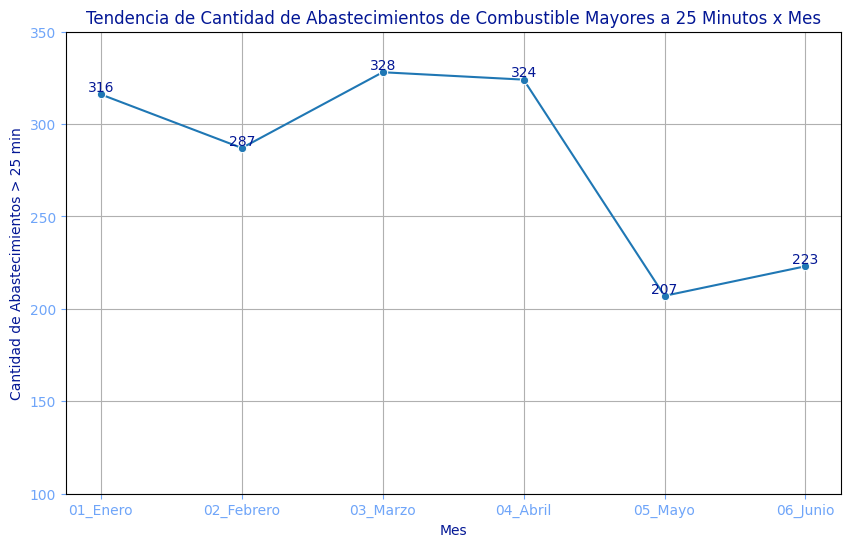

In [36]:
# Filter the data
filtered_data = grifo_2024[(grifo_2024['Name_Delayclass'] == 'Abastecimiento_combustible') & (grifo_2024['total_time'] > 25)]

# Group the filtered data and count occurrences
abastecimientos_mayor_25min = filtered_data.groupby('mes')['Name_Delayclass'].count().reset_index(name='cantidad_abastecimientos > a 25 min')

abastecimientos_mayor_25min.head(7)

# Crea el gráfico de línea
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=abastecimientos_mayor_25min, x='mes', y='cantidad_abastecimientos > a 25 min', marker='o')
# Colocar valores en cada punto
for x, y in zip(abastecimientos_mayor_25min['mes'], abastecimientos_mayor_25min['cantidad_abastecimientos > a 25 min']):
    ax.text(x, y, str(y), ha='center', va='bottom', color='#031795')

# Configurar etiquetas y título
plt.xlabel('Mes', color='#031795')
plt.ylabel('Cantidad de Abastecimientos > 25 min', color='#031795')
plt.title('Tendencia de Cantidad de Abastecimientos de Combustible Mayores a 25 Minutos x Mes', color='#031795')
plt.ylim(100, 350)
ax.tick_params(axis='x', colors='#6fa5f9')  # Cambia el color de las etiquetas del eje x
ax.tick_params(axis='y', colors='#6fa5f9')  # Cambia el color de las etiquetas del eje y
plt.grid(True)
plt.show()